# Include Libraries

In [ ]:
# Load in our libraries
import pandas as pd
import numpy as np
import re
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.feature_selection import SelectFromModel, SelectKBest
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score


sns.set(style='white', context='notebook', palette='deep')
pd.options.display.max_columns = 100

# Exploratory Data Analysis

In [ ]:
train = pd.read_csv("cs-training.csv")
kaggle_test = pd.read_csv("cs-test.csv")

In [ ]:
train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [ ]:
train.shape

(150000, 12)

In [ ]:
train.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [ ]:
train.isnull().sum()

,0
Unnamed: 0,0
SeriousDlqin2yrs,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
NumberOfTime30-59DaysPastDueNotWorse,0
DebtRatio,0
MonthlyIncome,29731
NumberOfOpenCreditLinesAndLoans,0
NumberOfTimes90DaysLate,0
NumberRealEstateLoansOrLines,0


SeriousDlqin2yrs is the target variable (label), it is binary.

The training set contains 150,000 observations of 11 features and 1 label.

All of our features are numerical in nature.

NumberOfDependents and MonthlyIncome contain NaN values, we also suspect that other variables contains errors (Age).

In [ ]:
kaggle_test.isnull().sum()

Unnamed: 0                                   0
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64

The test data also contains several NaN values

## Target distribution

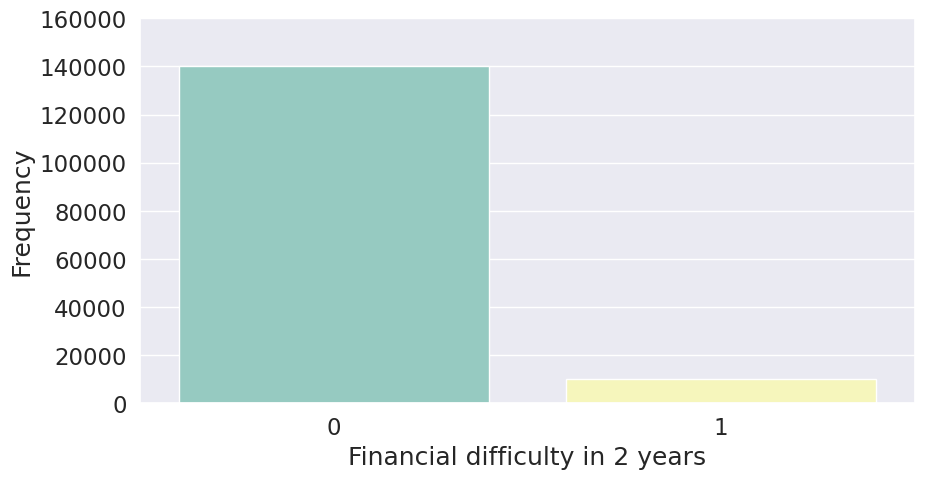

In [ ]:
ax = sns.countplot(x = train.SeriousDlqin2yrs ,palette="Set3")
sns.set(font_scale=1.5)
ax.set_xlabel('Financial difficulty in 2 years')
ax.set_ylabel('Frequency')
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_ylim(top=160000)

plt.show()

We can see that the distribution of our target variable is very skewed.

## Detecting outliers

In [ ]:
def detect_outliers(df,n,features):
    outlier_indices = []

    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 1.5 * IQR

        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index

        # append the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)

    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )

    return multiple_outliers

# detect outliers from Age, SibSp , Parch and Fare
# These are the numerical features present in the dataset
Outliers_to_drop = detect_outliers(train,2,["RevolvingUtilizationOfUnsecuredLines",
                                            "age",
                                            "NumberOfTime30-59DaysPastDueNotWorse",
                                            "DebtRatio",
                                            "MonthlyIncome",
                                            "NumberOfOpenCreditLinesAndLoans",
                                            "NumberOfTimes90DaysLate",
                                            "NumberRealEstateLoansOrLines",
                                            "NumberOfTime60-89DaysPastDueNotWorse",
                                            "Unnamed: 0",
                                            "NumberOfDependents"])

In [ ]:
train.loc[Outliers_to_drop]

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
900,901,0,2.258964,33,2,0.032484,2000.0,1,1,0,0,2.0
919,920,1,1.362142,73,1,274.000000,NaN,2,3,0,1,NaN
1958,1959,0,1.634551,28,0,151.000000,NaN,1,3,0,2,0.0
4852,4853,0,1.566866,46,2,0.104983,6000.0,3,2,0,0,0.0
5956,5957,0,2.237856,60,6,2597.000000,1.0,16,1,2,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
117338,117339,1,0.960692,42,0,1.241580,3770.0,29,1,2,1,3.0
126682,126683,1,0.344297,38,0,1.789158,4500.0,23,14,11,1,0.0
129570,129571,0,0.075067,58,0,0.298925,17388.0,24,0,6,1,0.0
5833,5834,1,0.917527,44,0,1.852144,3800.0,13,1,7,1,1.0


We detected 3527 outliers in the training set, which represents 2.53% of our training data. We will drop these outliers.

In [ ]:
train = train.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

## Merging datasets

In [ ]:
train_len = len(train)
dataset =  pd.concat(objs=[train, kaggle_test], axis=0).reset_index(drop=True)

In [ ]:
dataset.shape

(247976, 12)

In [ ]:
dataset = dataset.rename(columns={'Unnamed: 0': 'Unknown',
                                  'SeriousDlqin2yrs': 'Target',
                                  'RevolvingUtilizationOfUnsecuredLines': 'UnsecLines',
                                  'NumberOfTime30-59DaysPastDueNotWorse': 'Late3059',
                                  'DebtRatio': 'DebtRatio',
                                  'MonthlyIncome': 'MonthlyIncome',
                                  'NumberOfOpenCreditLinesAndLoans': 'OpenCredit',
                                  'NumberOfTimes90DaysLate': 'Late90',
                                  'NumberRealEstateLoansOrLines': 'PropLines',
                                  'NumberOfTime60-89DaysPastDueNotWorse': 'Late6089',
                                  'NumberOfDependents': 'Deps'})

train = train.rename(columns={'Unnamed: 0': 'Unknown',
                                  'SeriousDlqin2yrs': 'Target',
                                  'RevolvingUtilizationOfUnsecuredLines': 'UnsecLines',
                                  'NumberOfTime30-59DaysPastDueNotWorse': 'Late3059',
                                  'DebtRatio': 'DebtRatio',
                                  'MonthlyIncome': 'MonthlyIncome',
                                  'NumberOfOpenCreditLinesAndLoans': 'OpenCredit',
                                  'NumberOfTimes90DaysLate': 'Late90',
                                  'NumberRealEstateLoansOrLines': 'PropLines',
                                  'NumberOfTime60-89DaysPastDueNotWorse': 'Late6089',
                                  'NumberOfDependents': 'Deps'})

kaggle_test = kaggle_test.rename(columns={'Unnamed: 0': 'Unknown',
                                  'SeriousDlqin2yrs': 'Target',
                                  'RevolvingUtilizationOfUnsecuredLines': 'UnsecLines',
                                  'NumberOfTime30-59DaysPastDueNotWorse': 'Late3059',
                                  'DebtRatio': 'DebtRatio',
                                  'MonthlyIncome': 'MonthlyIncome',
                                  'NumberOfOpenCreditLinesAndLoans': 'OpenCredit',
                                  'NumberOfTimes90DaysLate': 'Late90',
                                  'NumberRealEstateLoansOrLines': 'PropLines',
                                  'NumberOfTime60-89DaysPastDueNotWorse': 'Late6089',
                                  'NumberOfDependents': 'Deps'})

## Exploring variables

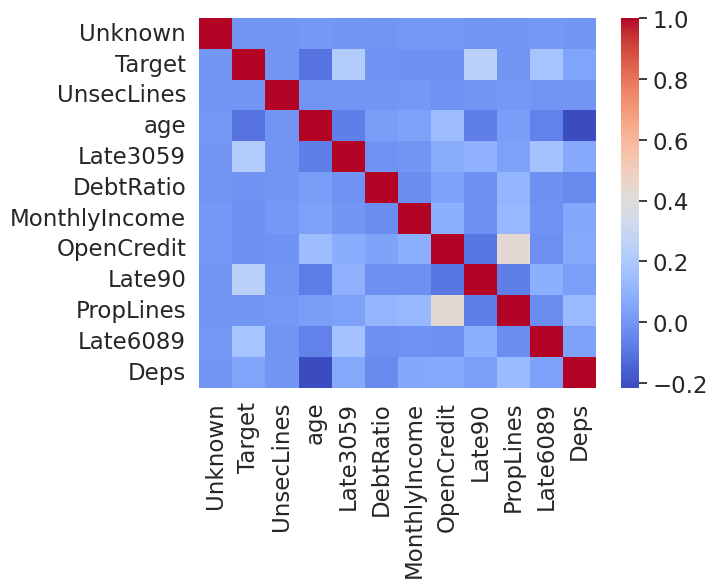

In [ ]:
# Correlation matrix
g = sns.heatmap(train.corr(),annot=False, fmt = ".2f", cmap = "coolwarm")

We can see that the Target has the highest correlation with age, previous late payments, and the number of dependants.

## Exploring UnsecLines

In [ ]:
dataset.UnsecLines.describe()

,UnsecLines
count,247976.000000
mean,5.678007
std,229.111400
min,0.000000
25%,0.029372
50%,0.148802
75%,0.544452
max,50708.000000


In [ ]:
dataset.UnsecLines = pd.qcut(dataset.UnsecLines.values, 5).codes

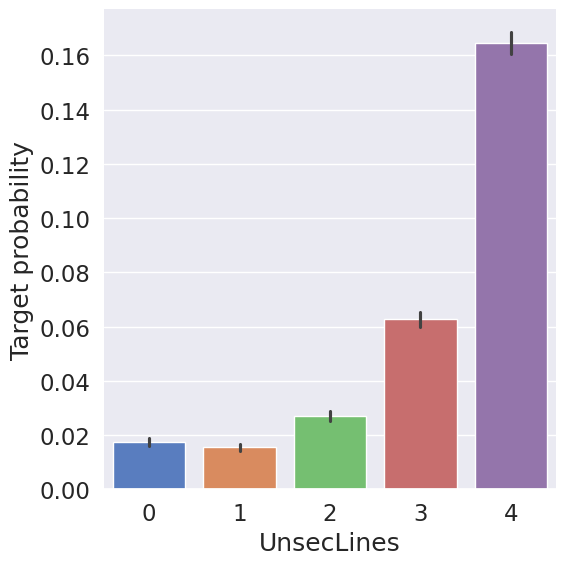

In [ ]:
# Explore UnsecLines feature vs Target
g = sns.catplot(x="UnsecLines", y="Target", data=dataset, kind="bar", height=6, palette="muted")
g.despine(left=True)
g.set_ylabels("Target probability")

We can that there is an almost exponential relationship between this variable and our target.

## Exploring Age

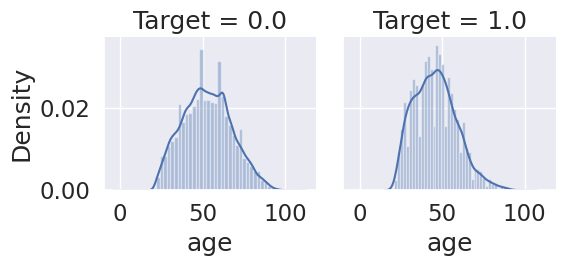

In [ ]:
# Explore Age vs Survived
g = sns.FacetGrid(dataset, col='Target')
g = g.map(sns.distplot, "age")

In [ ]:
dataset.age = pd.qcut(dataset.age.values, 5).codes

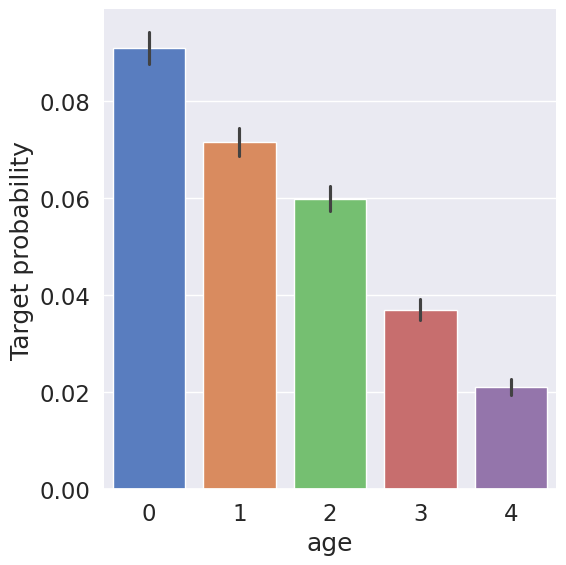

In [ ]:
# Explore age feature vs Target
g = sns.catplot(x="age", y="Target", data=dataset, kind="bar", height=6, palette="muted")
g.despine(left=True)
g.set_ylabels("Target probability")

We can see that age has an inverse relationship to default risk

## Exploring Late3059

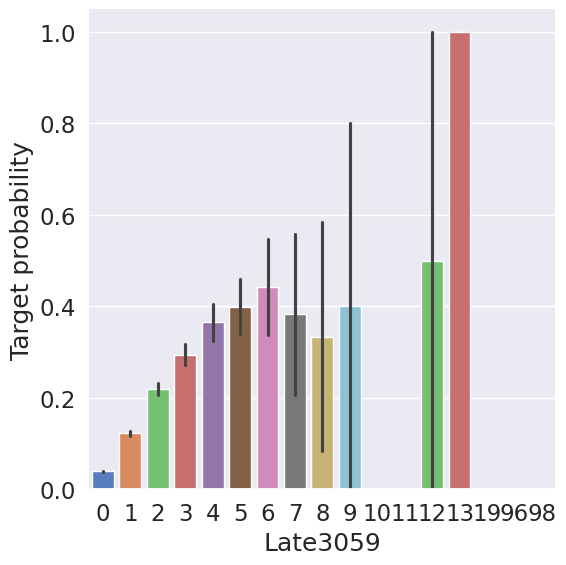

In [ ]:

# Explore Late3059 feature vs Target
g = sns.catplot(x="Late3059", y="Target", data=dataset, kind="bar", height=6, palette="muted")
g.despine(left=True)
g.set_ylabels("Target probability")

In [ ]:
for i in range(len(dataset)):
    if dataset.Late3059[i] >= 6:
        dataset.Late3059[i] = 6

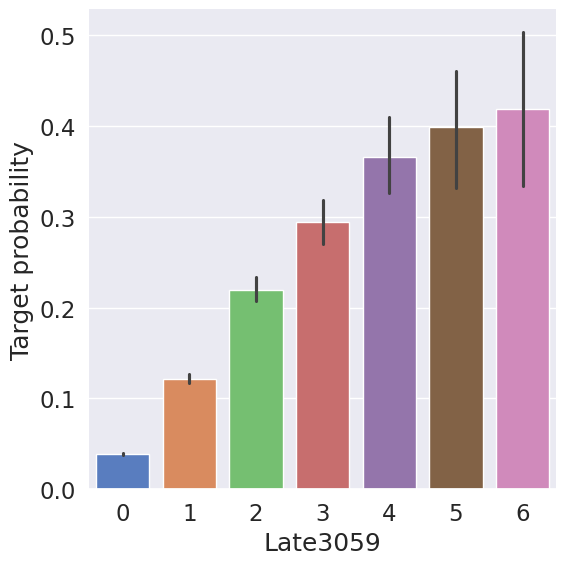

In [ ]:
# Explore Late3059 feature vs Target
g = sns.catplot(x="Late3059", y="Target", data=dataset, kind="bar", height=6, palette="muted")
g.despine(left=True)
g.set_ylabels("Target probability")

Due to very high standard deviations we decided to group customers who have 6 or more late payments together. We can see that this has boosted the predictive capacity and reduced the variance of Late3059

## Exploring DebtRatio

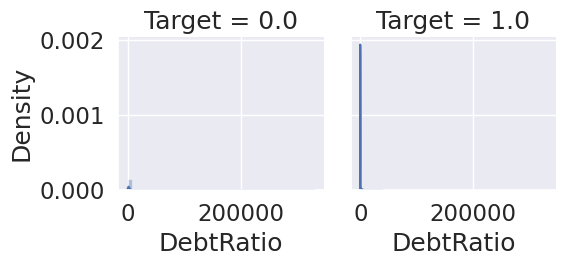

In [ ]:
# Explore Age vs Survived
g = sns.FacetGrid(dataset, col='Target')
g = g.map(sns.distplot, "DebtRatio")

In [ ]:
dataset.DebtRatio = pd.qcut(dataset.DebtRatio.values, 5).codes

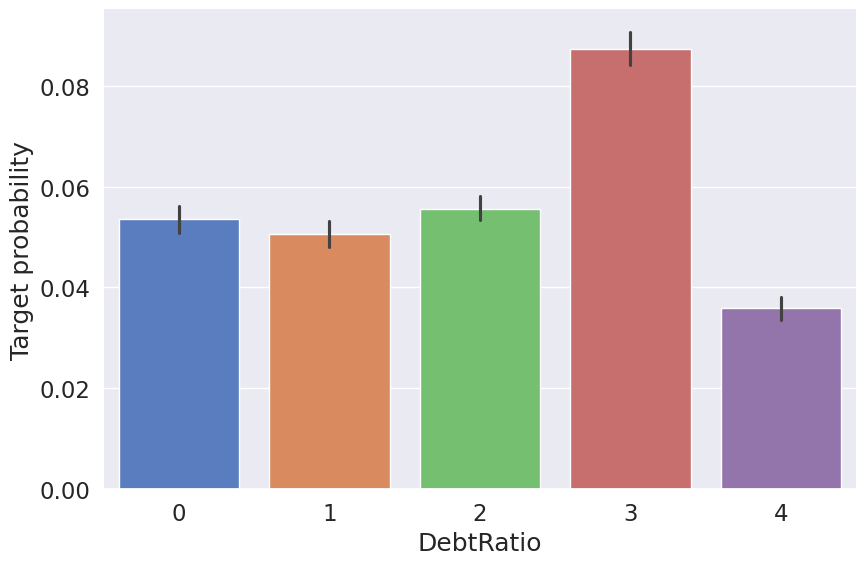

In [ ]:
# Explore DebtRatio feature quantiles vs Target
g = sns.catplot(
    x="DebtRatio",
    y="Target",
    data=dataset,
    kind="bar",
    height=6,
    aspect=1.5,
    palette="muted"
)

# Adjust plot aesthetics
g.despine(left=True)
g.set_axis_labels("DebtRatio", "Target probability")

plt.show()

## Exploring MonthlyIncome

In [ ]:
dataset.MonthlyIncome.isnull().sum()

48352

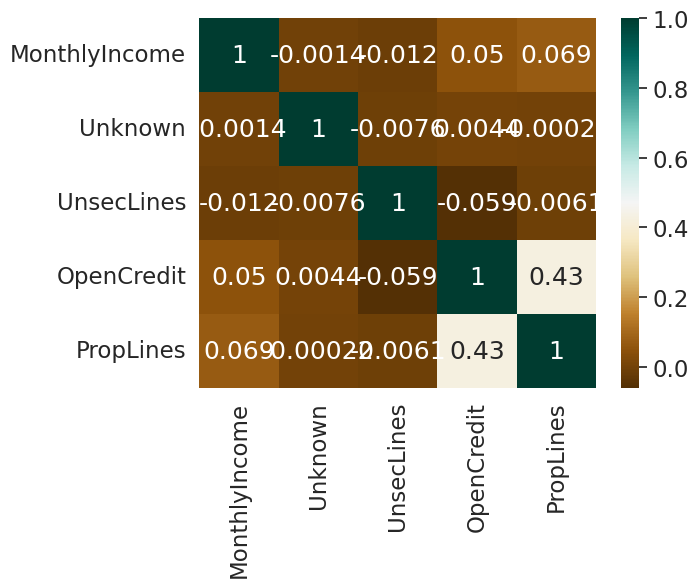

In [ ]:
g = sns.heatmap(dataset[["MonthlyIncome","Unknown","UnsecLines","OpenCredit","PropLines"]].corr(),cmap="BrBG",annot=True)

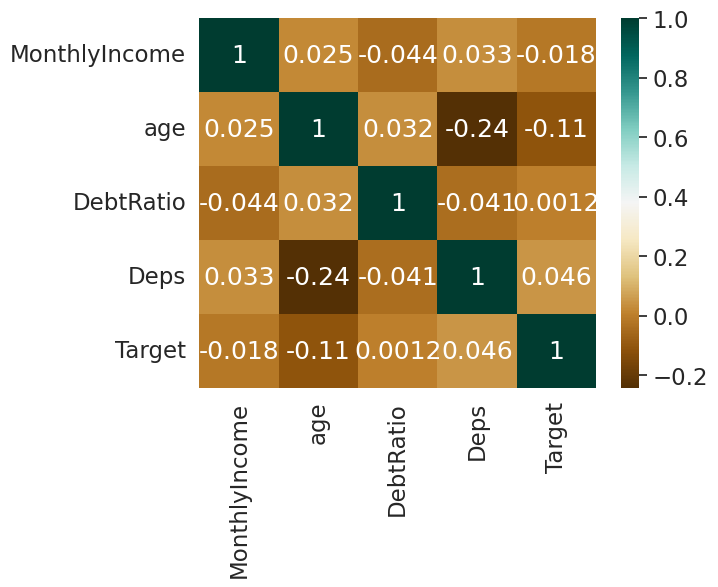

In [ ]:
g = sns.heatmap(dataset[["MonthlyIncome","age","DebtRatio","Deps","Target"]].corr(),cmap="BrBG",annot=True)

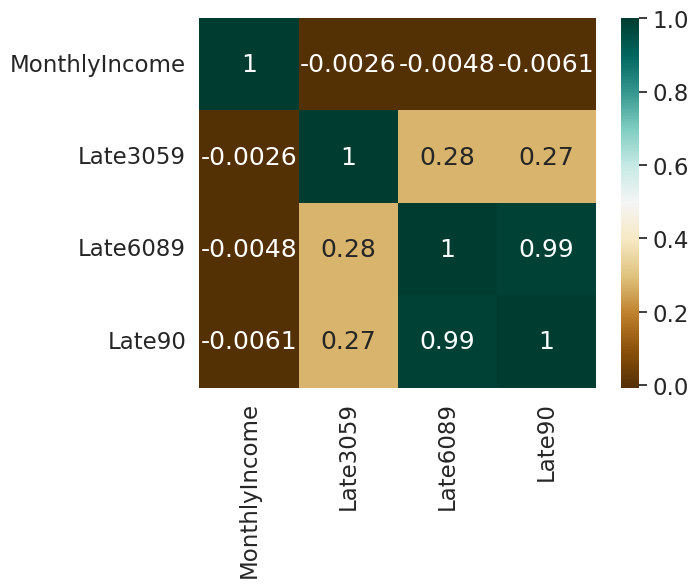

In [ ]:
g = sns.heatmap(dataset[["MonthlyIncome","Late3059","Late6089","Late90"]].corr(),cmap="BrBG",annot=True)

We can see that MonthlyIncome has no strong correlation with any other variable so we cannot accurately estimate the NaN values. Thus, we will fill the NaN with the median value

In [ ]:
dataset.MonthlyIncome.median()

5414.0

In [ ]:
#Fill Embarked nan values of dataset set with 'S' most frequent value
dataset.MonthlyIncome = dataset.MonthlyIncome.fillna(dataset.MonthlyIncome.median())

In [ ]:
dataset.MonthlyIncome = pd.qcut(dataset.MonthlyIncome.values, 5).codes

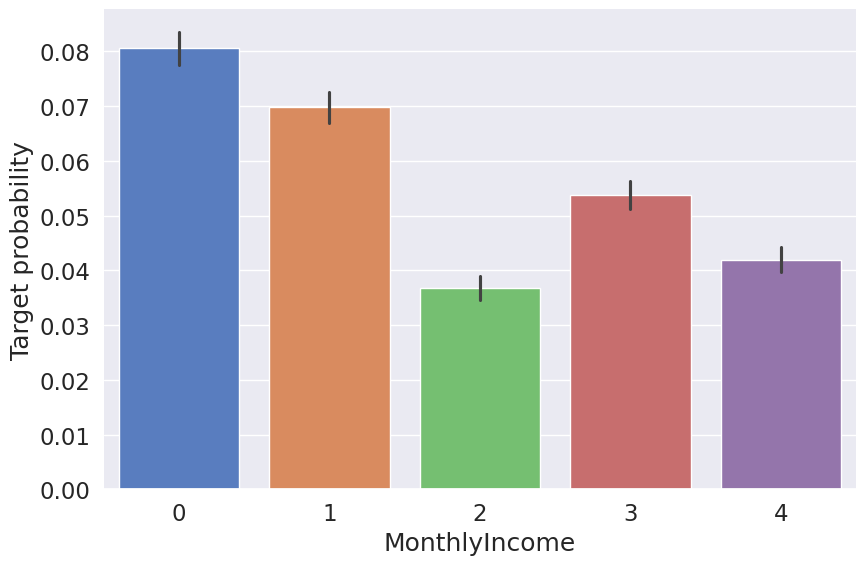

In [ ]:
# Explore MonthlyIncome feature quantiles vs Target
g = sns.catplot(
    x="MonthlyIncome",
    y="Target",
    data=dataset,
    kind="bar",
    height=6,
    aspect=1.5,
    palette="muted"
)

# Adjust plot aesthetics
g.despine(left=True)
g.set_axis_labels("MonthlyIncome", "Target probability")

plt.show()

## Exploring OpenCredit

In [ ]:
dataset.OpenCredit.describe()

,OpenCredit
count,247976.000000
mean,8.457516
std,5.109915
min,0.000000
25%,5.000000
50%,8.000000
75%,11.000000
max,85.000000


In [ ]:
dataset.OpenCredit = pd.qcut(dataset.OpenCredit.values, 5).codes

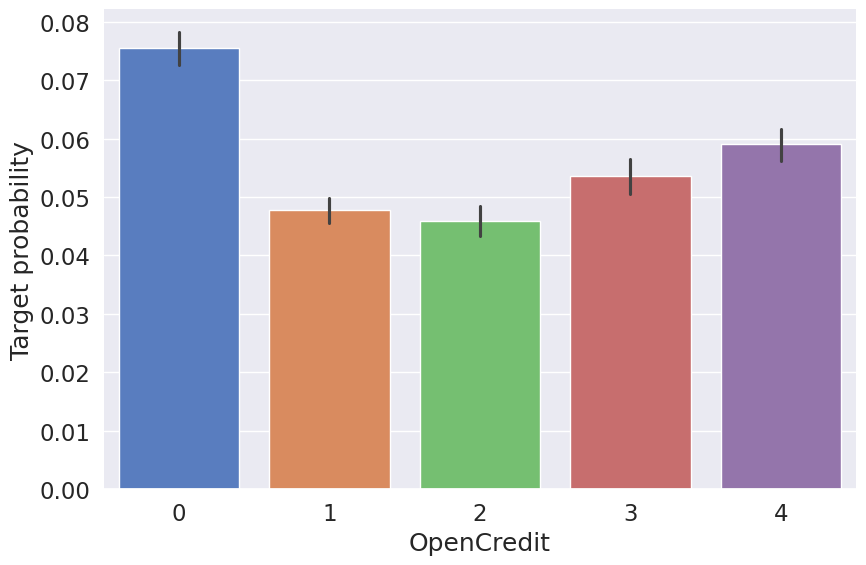

In [ ]:
# Explore OpenCredit feature quantiles vs Target
g = sns.catplot(
    x="OpenCredit",
    y="Target",
    data=dataset,
    kind="bar",
    height=6,
    aspect=1.5,
    palette="muted"
)

# Adjust plot aesthetics
g.despine(left=True)
g.set_axis_labels("OpenCredit", "Target probability")

plt.show()

## Exploring Late90

In [ ]:
dataset.Late90.describe()

,Late90
count,247976.000000
mean,0.156894
std,2.906148
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,98.000000


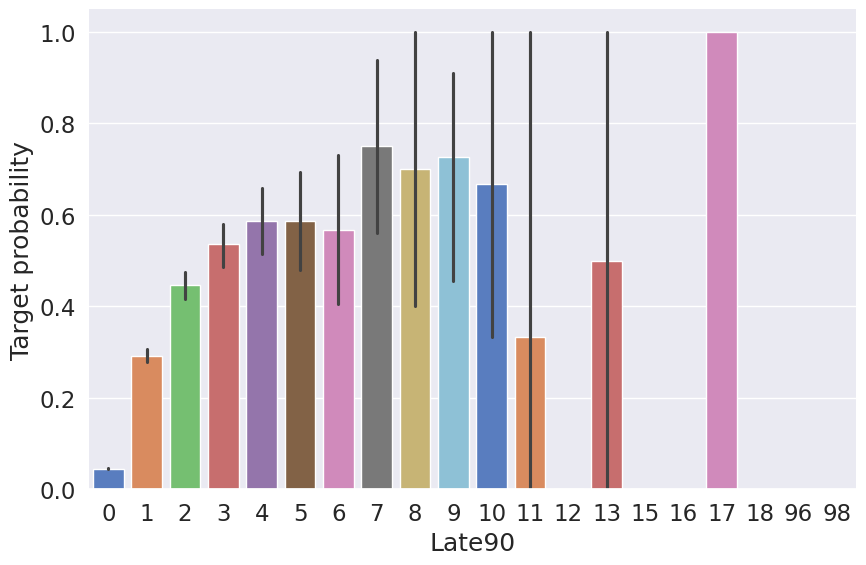

In [ ]:
# Explore Late90 feature quantiles vs Target
g = sns.catplot(
    x="Late90",
    y="Target",
    data=dataset,
    kind="bar",
    height=6,
    aspect=1.5,
    palette="muted"
)

# Adjust plot aesthetics
g.despine(left=True)
g.set_axis_labels("Late90", "Target probability")

plt.show()

In [ ]:
for i in range(len(dataset)):
    if dataset.Late90[i] >= 5:
        dataset.Late90[i] = 5

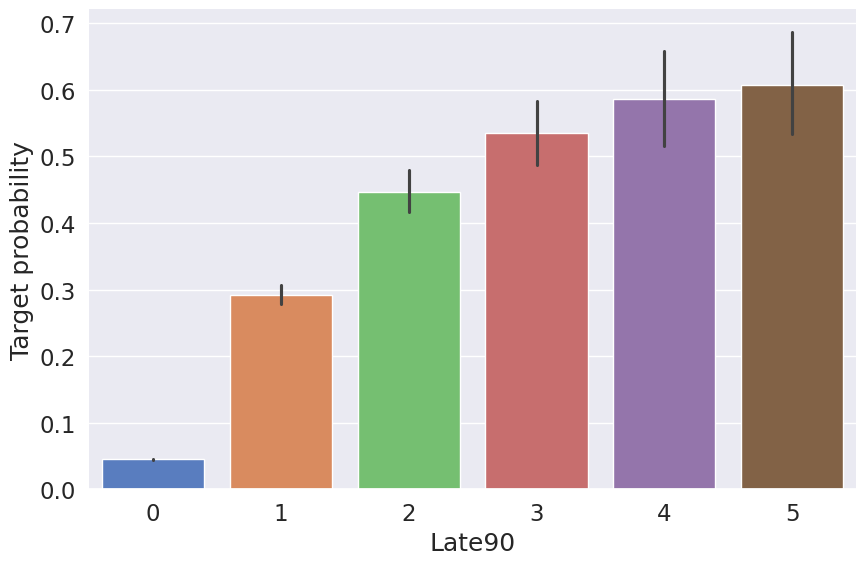

In [ ]:
# Explore Late90 feature quantiles vs Target
g = sns.catplot(
    x="Late90",
    y="Target",
    data=dataset,
    kind="bar",
    height=6,
    aspect=1.5,
    palette="muted"
)

# Adjust plot aesthetics
g.despine(left=True)
g.set_axis_labels("Late90", "Target probability")

plt.show()

## Exploring PropLines

In [ ]:
dataset.PropLines.describe()

,PropLines
count,247976.000000
mean,1.013703
std,1.092993
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,37.000000


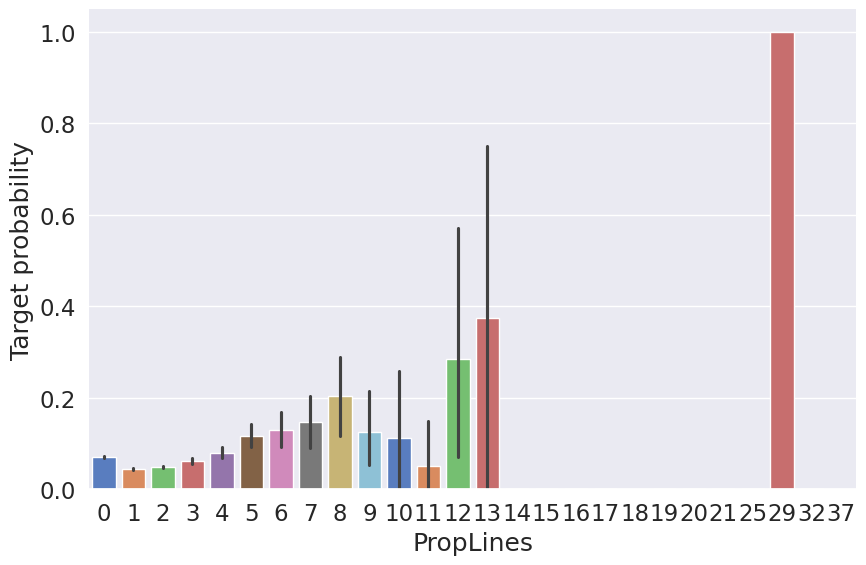

In [ ]:
# Explore PropLines feature quantiles vs Target
g = sns.catplot(
    x="PropLines",
    y="Target",
    data=dataset,
    kind="bar",
    height=6,
    aspect=1.5,
    palette="muted"
)

# Adjust plot aesthetics
g.despine(left=True)
g.set_axis_labels("PropLines", "Target probability")

plt.show()

In [ ]:
for i in range(len(dataset)):
    if dataset.PropLines[i] >= 6:
        dataset.PropLines[i] = 6

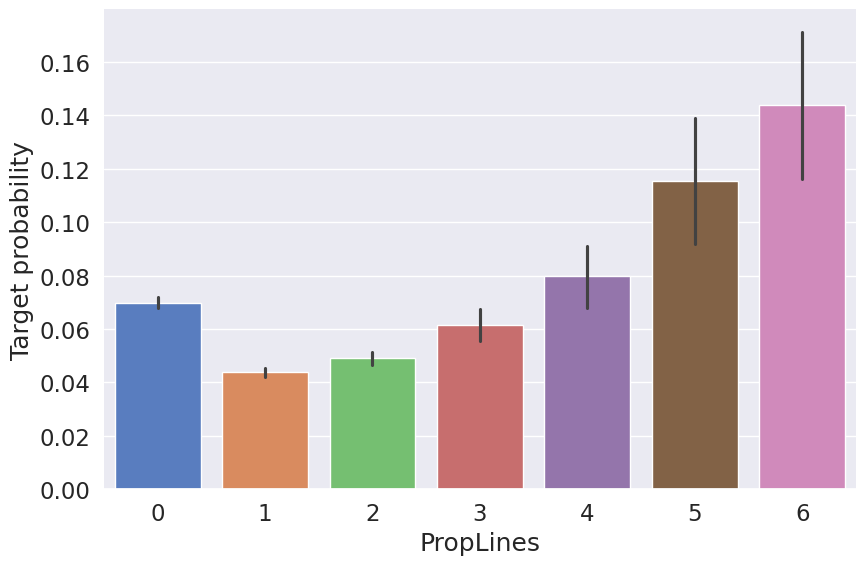

In [ ]:

# Explore PropLines feature quantiles vs Target
g = sns.catplot(
    x="PropLines",
    y="Target",
    data=dataset,
    kind="bar",
    height=6,       # Height of the plot
    aspect=1.5,     # Aspect ratio of the plot
    palette="muted"
)

# Adjust plot aesthetics
g.despine(left=True)
g.set_axis_labels("PropLines", "Target probability")

plt.show()

## Exploring Late6089

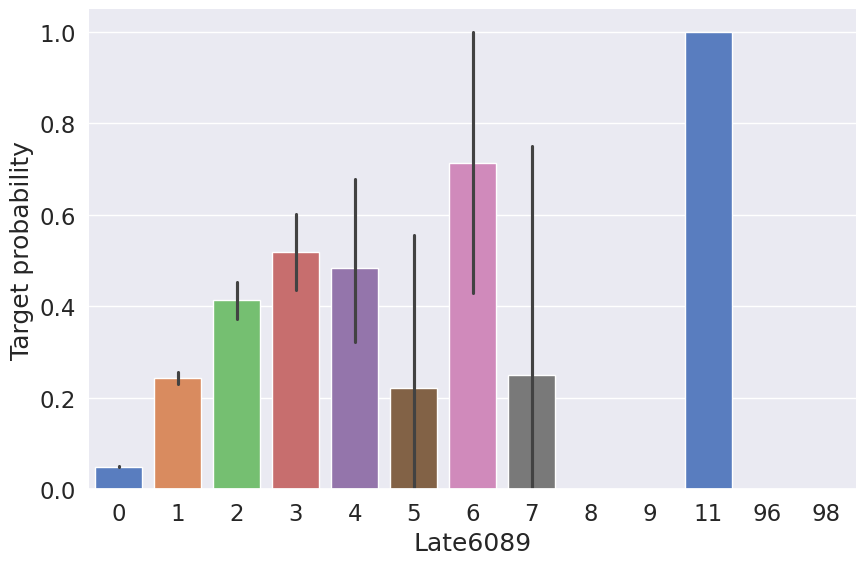

In [ ]:
# Explore Late6089 feature quantiles vs Target
g = sns.catplot(
    x="Late6089",
    y="Target",
    data=dataset,
    kind="bar",
    height=6,       # Height of the plot
    aspect=1.5,     # Aspect ratio of the plot
    palette="muted"
)

# Adjust plot aesthetics
g.despine(left=True)
g.set_axis_labels("Late6089", "Target probability")

plt.show()

In [ ]:
for i in range(len(dataset)):
    if dataset.Late6089[i] >= 3:
        dataset.Late6089[i] = 3

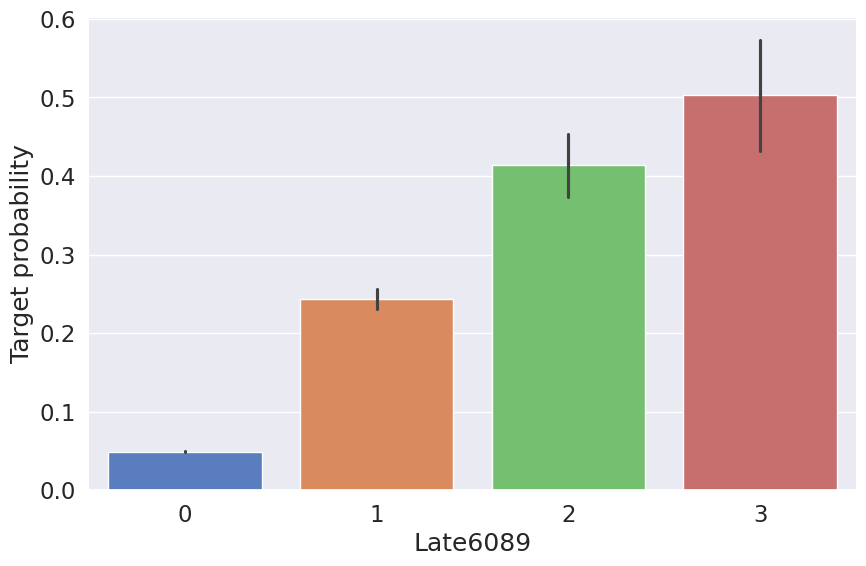

In [ ]:
# Explore Late6089 feature quantiles vs Target
g = sns.catplot(
    x="Late6089",
    y="Target",
    data=dataset,
    kind="bar",
    height=6,       # Height of the plot
    aspect=1.5,     # Aspect ratio of the plot
    palette="muted"
)

# Adjust plot aesthetics
g.despine(left=True)
g.set_axis_labels("Late6089", "Target probability")

plt.show()

## Exploring Deps

In [ ]:
dataset.Deps.describe()

,Deps
count,241584.000000
mean,0.761561
std,1.123201
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,43.000000


In [ ]:
dataset.Deps = dataset.Deps.fillna(dataset.Deps.median())

In [ ]:
dataset.Deps.isnull().sum()

0

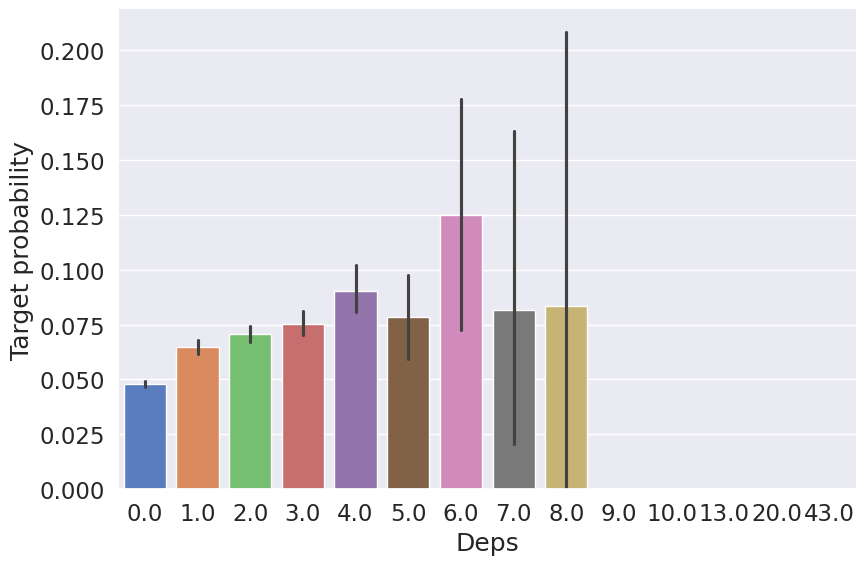

In [ ]:
# Explore Deps feature quantiles vs Target
g = sns.catplot(
    x="Deps",
    y="Target",
    data=dataset,
    kind="bar",
    height=6,       # Height of the plot
    aspect=1.5,     # Aspect ratio of the plot
    palette="muted"
)

# Adjust plot aesthetics
g.despine(left=True)
g.set_axis_labels("Deps", "Target probability")

plt.show()

In [ ]:
for i in range(len(dataset)):
    if dataset.Deps[i] >= 4:
        dataset.Deps[i] = 4

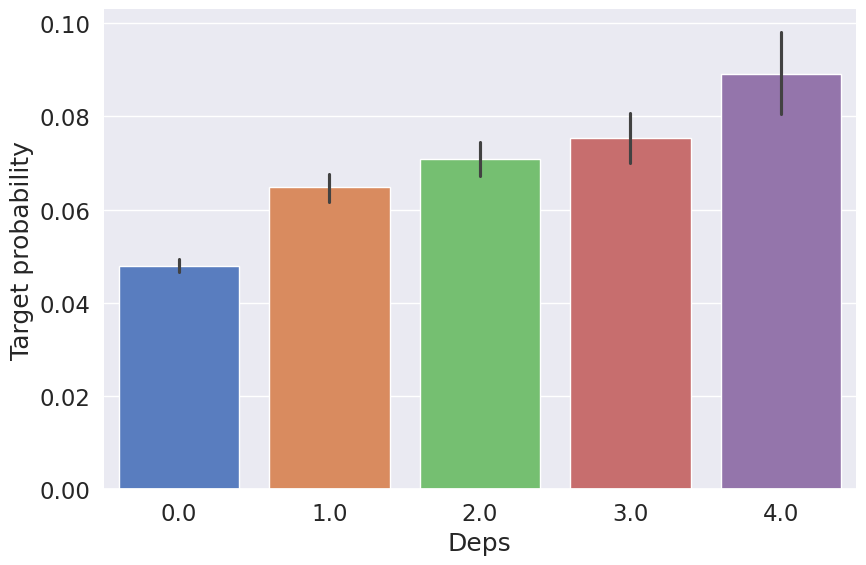

In [ ]:
# Explore Deps feature quantiles vs Target
g = sns.catplot(
    x="Deps",
    y="Target",
    data=dataset,
    kind="bar",
    height=6,       # Height of the plot
    aspect=1.5,     # Aspect ratio of the plot
    palette="muted"
)

# Adjust plot aesthetics
g.despine(left=True)
g.set_axis_labels("Deps", "Target probability")

plt.show()

## Final NaN check

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247976 entries, 0 to 247975
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unknown        247976 non-null  int64  
 1   Target         146473 non-null  float64
 2   UnsecLines     247976 non-null  int8   
 3   age            247976 non-null  int8   
 4   Late3059       247976 non-null  int64  
 5   DebtRatio      247976 non-null  int8   
 6   MonthlyIncome  247976 non-null  int8   
 7   OpenCredit     247976 non-null  int8   
 8   Late90         247976 non-null  int64  
 9   PropLines      247976 non-null  int64  
 10  Late6089       247976 non-null  int64  
 11  Deps           247976 non-null  float64
dtypes: float64(2), int64(5), int8(5)
memory usage: 14.4 MB


In [ ]:
dataset.head()

,Unknown,Target,UnsecLines,age,Late3059,DebtRatio,MonthlyIncome,OpenCredit,Late90,PropLines,Late6089,Deps
0,1,1.0,4,1,2,3,4,4,0,6,0,2.0
1,2,0.0,4,1,0,0,0,0,0,0,0,1.0
2,3,0.0,3,0,1,0,0,0,1,0,0,0.0
3,4,0.0,2,0,0,0,0,1,0,0,0,0.0
4,5,0.0,4,2,1,0,4,1,0,1,0,0.0


Building binary/dummy variables

In [ ]:
dataset = pd.get_dummies(dataset, columns = ["UnsecLines"], prefix="UnsecLines")
dataset = pd.get_dummies(dataset, columns = ["age"], prefix="age")
dataset = pd.get_dummies(dataset, columns = ["Late3059"], prefix="Late3059")
dataset = pd.get_dummies(dataset, columns = ["DebtRatio"], prefix="DebtRatio")
dataset = pd.get_dummies(dataset, columns = ["MonthlyIncome"], prefix="MonthlyIncome")
dataset = pd.get_dummies(dataset, columns = ["OpenCredit"], prefix="OpenCredit")
dataset = pd.get_dummies(dataset, columns = ["Late90"], prefix="Late90")
dataset = pd.get_dummies(dataset, columns = ["PropLines"], prefix="PropLines")
dataset = pd.get_dummies(dataset, columns = ["Late6089"], prefix="Late6089")
dataset = pd.get_dummies(dataset, columns = ["Deps"], prefix="Deps")

In [ ]:
dataset.head()

,Unknown,Target,UnsecLines_0,UnsecLines_1,UnsecLines_2,UnsecLines_3,UnsecLines_4,age_0,age_1,age_2,age_3,age_4,Late3059_0,Late3059_1,Late3059_2,Late3059_3,Late3059_4,Late3059_5,Late3059_6,DebtRatio_0,DebtRatio_1,DebtRatio_2,DebtRatio_3,DebtRatio_4,MonthlyIncome_0,MonthlyIncome_1,MonthlyIncome_2,MonthlyIncome_3,MonthlyIncome_4,OpenCredit_0,OpenCredit_1,OpenCredit_2,OpenCredit_3,OpenCredit_4,Late90_0,Late90_1,Late90_2,Late90_3,Late90_4,Late90_5,PropLines_0,PropLines_1,PropLines_2,PropLines_3,PropLines_4,PropLines_5,PropLines_6,Late6089_0,Late6089_1,Late6089_2,Late6089_3,Deps_0.0,Deps_1.0,Deps_2.0,Deps_3.0,Deps_4.0
0,1,1.0,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False
1,2,0.0,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False
2,3,0.0,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
3,4,0.0,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
4,5,0.0,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False


In [ ]:
dataset.shape

(247976, 56)

## Building our credit scoring model

In [ ]:
train = dataset[:train_len]
Kaggle_test = dataset[train_len:]
Kaggle_test.drop(labels=["Target"],axis = 1,inplace=True)

In [ ]:
Kaggle_test.shape

(101503, 55)

In [ ]:
## Separate train features and label

train["Target"] = train["Target"].astype(int)

Y_train = train["Target"]

X_train = train.drop(labels = ["Target", "Unknown"],axis = 1)

In [ ]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(X_train, Y_train)

In [ ]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

<Axes: ylabel='feature'>

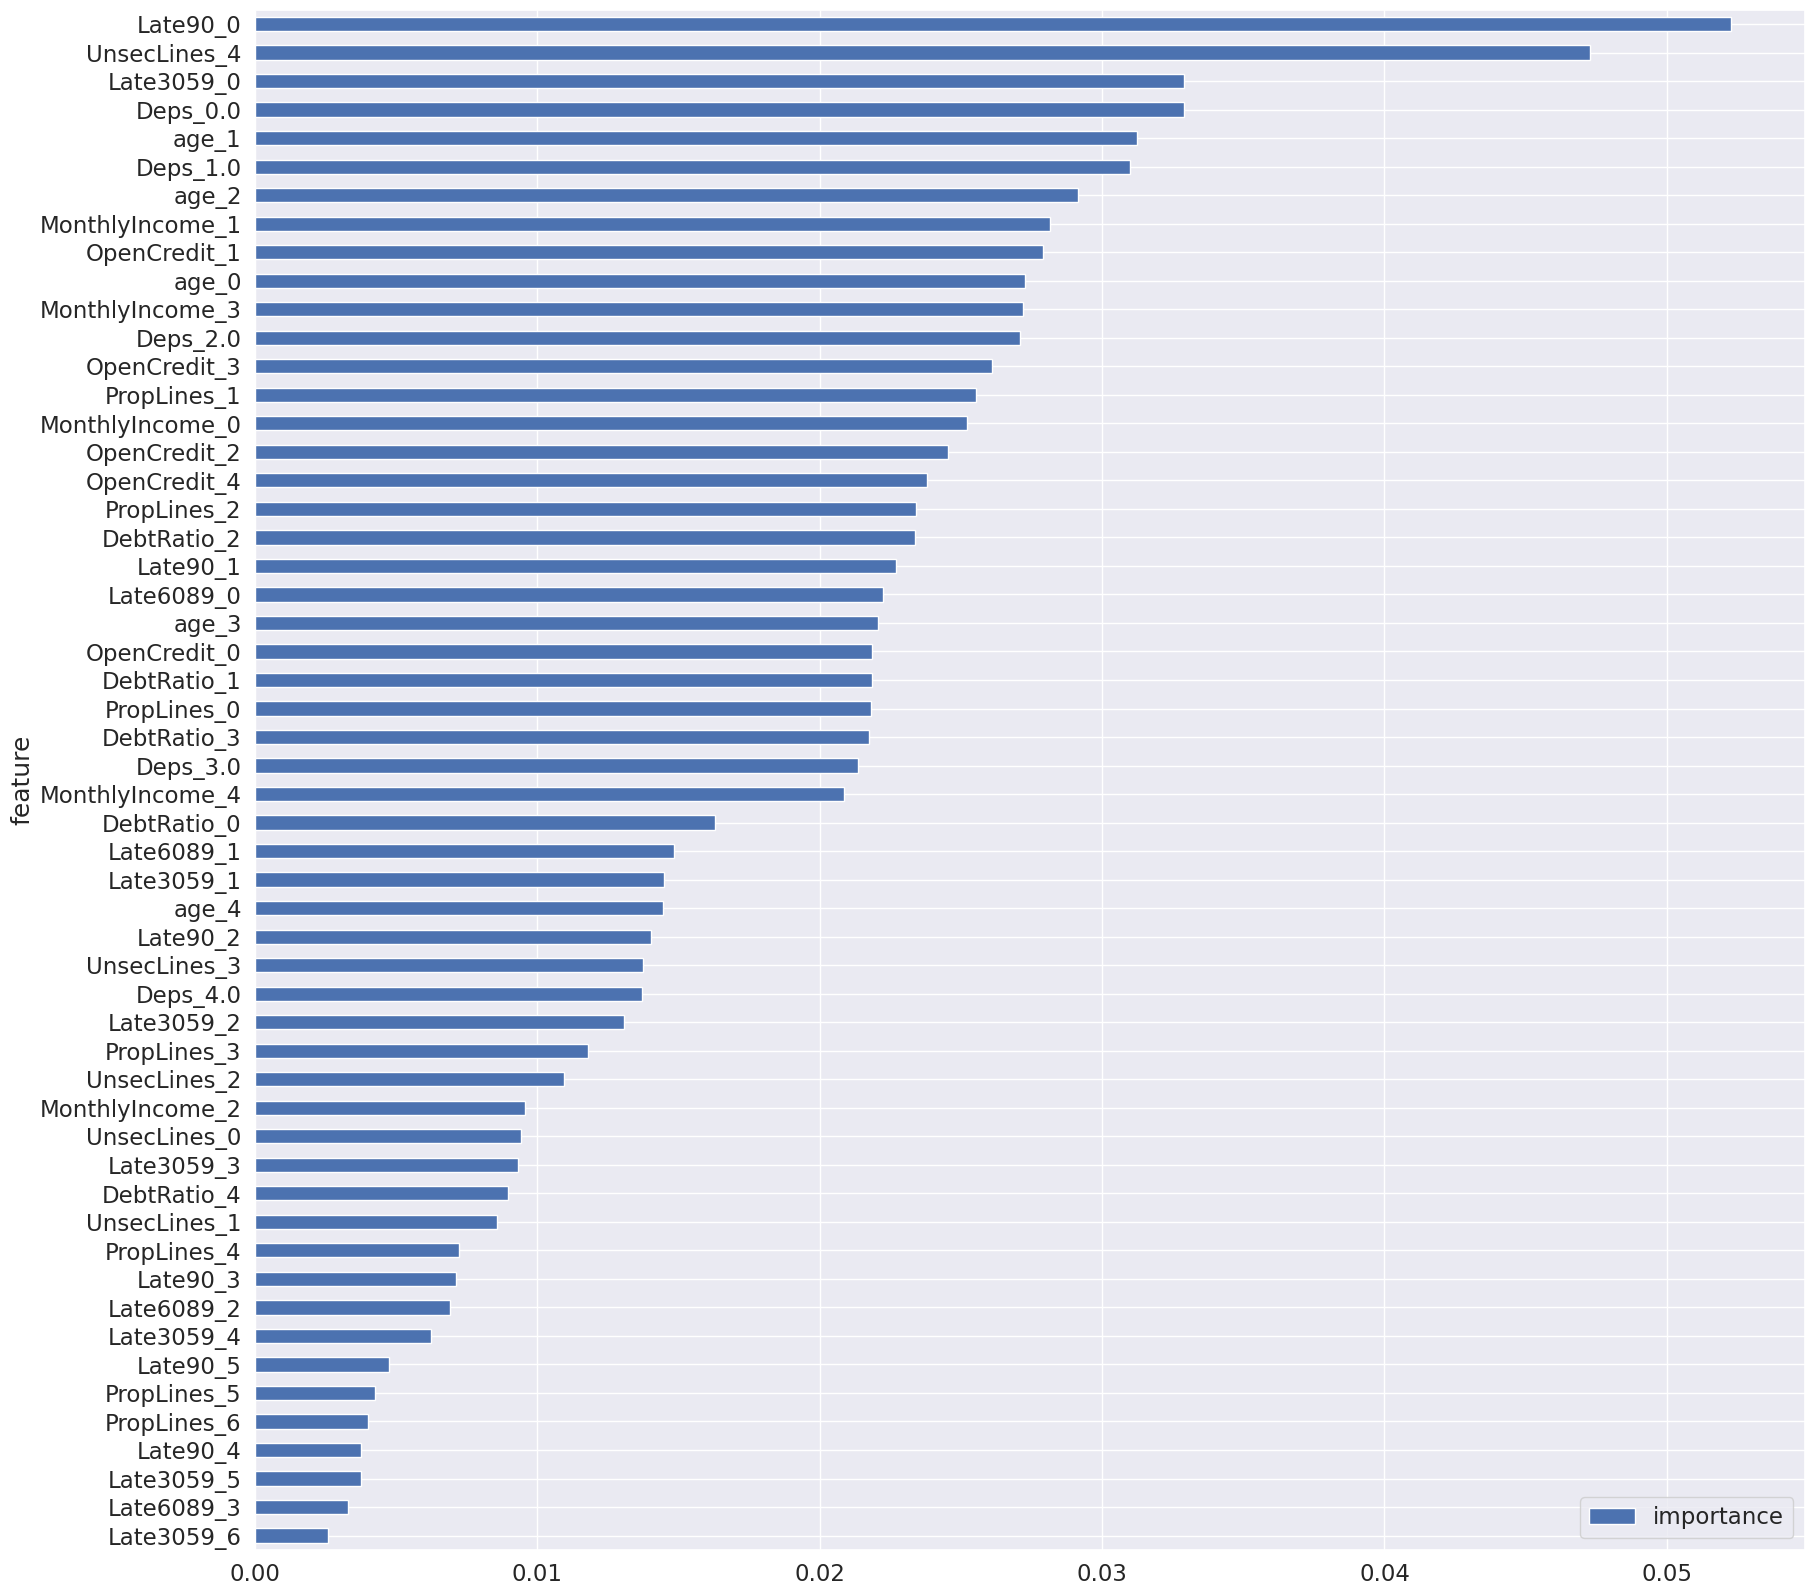

In [ ]:
features.plot(kind='barh', figsize=(20, 20))

In [ ]:
parameters = {'n_estimators': 1000, 'random_state' : 20}

model = RandomForestClassifier(**parameters)
model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=1000, random_state=20)

In [ ]:
Kaggle_test.head()

,Unknown,UnsecLines_0,UnsecLines_1,UnsecLines_2,UnsecLines_3,UnsecLines_4,age_0,age_1,age_2,age_3,age_4,Late3059_0,Late3059_1,Late3059_2,Late3059_3,Late3059_4,Late3059_5,Late3059_6,DebtRatio_0,DebtRatio_1,DebtRatio_2,DebtRatio_3,DebtRatio_4,MonthlyIncome_0,MonthlyIncome_1,MonthlyIncome_2,MonthlyIncome_3,MonthlyIncome_4,OpenCredit_0,OpenCredit_1,OpenCredit_2,OpenCredit_3,OpenCredit_4,Late90_0,Late90_1,Late90_2,Late90_3,Late90_4,Late90_5,PropLines_0,PropLines_1,PropLines_2,PropLines_3,PropLines_4,PropLines_5,PropLines_6,Late6089_0,Late6089_1,Late6089_2,Late6089_3,Deps_0.0,Deps_1.0,Deps_2.0,Deps_3.0,Deps_4.0
146473,1,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
146474,2,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False
146475,3,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False
146476,4,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False
146477,5,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False


In [ ]:
results_df = pd.read_csv("cs-test.csv")

In [ ]:
results_df = results_df.drop(["RevolvingUtilizationOfUnsecuredLines",
                             "age",
                             "NumberOfTime30-59DaysPastDueNotWorse",
                             "DebtRatio",
                             "MonthlyIncome",
                             "NumberOfOpenCreditLinesAndLoans",
                             "NumberOfTimes90DaysLate",
                             "NumberRealEstateLoansOrLines",
                             "NumberOfTime60-89DaysPastDueNotWorse",
                             "NumberOfDependents"], axis=1)

In [ ]:
DefaultProba = model.predict_proba(Kaggle_test.drop(["Unknown"], axis=1))
DefaultProba = DefaultProba[:,1]
results_df.SeriousDlqin2yrs = DefaultProba

results_df = results_df.rename(columns={'Unnamed: 0': 'Id',
                                        'SeriousDlqin2yrs': 'Probability'})

In [ ]:
results_df.head()

,Unnamed: 0,SeriousDlqin2yrs
0,1,NaN
1,2,NaN
2,3,NaN
3,4,NaN
4,5,NaN


In [ ]:
results_df.to_csv("KAGGLE_CREDIT_SCORE.csv", index=False)

This model lead to an accuracy rate of 0.800498 on Kaggle's unseen test data.

This accuracy rate is acceptable given that we used a relatively simple quantile based approach and in light of the fact that no parameter optimization was undertaken.